<a href="https://colab.research.google.com/github/s-lizzie/DataAnalystPortfolio/blob/main/PythonTextAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лексический и стилистической анализ текста с использованием NLP на Python

Инструменты: SpaCy, Pandas, Seaborn \
Исходный текст: англоязычный отрывок из художественной литературы, объемом >20 000 символов

In [11]:
# Импорт необходимых библиотек. Чтение файла
import pandas as pd
import spacy
import matplotlib.pyplot as PLT
import seaborn

In [12]:
nlp = spacy.load("en_core_web_sm")

file = open('The-Diary-of-a-Bookseller.txt', 'r', encoding='utf-8')
text = file.read()

# Создание датафрейма. Сохранение данных в Excel формат для дальнейшего анализа.
doc = nlp(text)
data = []
for token in doc:
  if not token.is_space and not token.is_punct:
    data.append( {
        'token': token.text,
        'lemma': token.lemma_,
        'pos': token.pos_,
        'is_stop': token.is_stop
    })


dataframe = pd.DataFrame(data)
dataframe.to_excel('The-Diary-of-a-Bookseller.xlsx')

Для корректроного анализа текста была выполнена предобратока текста (токенизация, лемматизация, фильтрация по стоп-словам и POS-tagging)

###Список частотных лемм в тексте


In [5]:

# 10 наиболее часто встречающихся слов
data_words = dataframe.groupby('lemma').size().sort_values(ascending=False).head(10)
data_words


,0
lemma,
the,474
be,328
a,269
to,249
and,244
of,225
I,185
in,177
that,126


In [6]:
# 10 наиболее часто встречающихся частей речи
data_pos = dataframe.groupby('pos').size().sort_values(ascending=False).head(10)
data_pos

,0
pos,
NOUN,1626
ADP,1065
VERB,1057
PRON,973
DET,870
ADJ,551
AUX,499
ADV,476
PROPN,453


Визуализация распределения частей речи




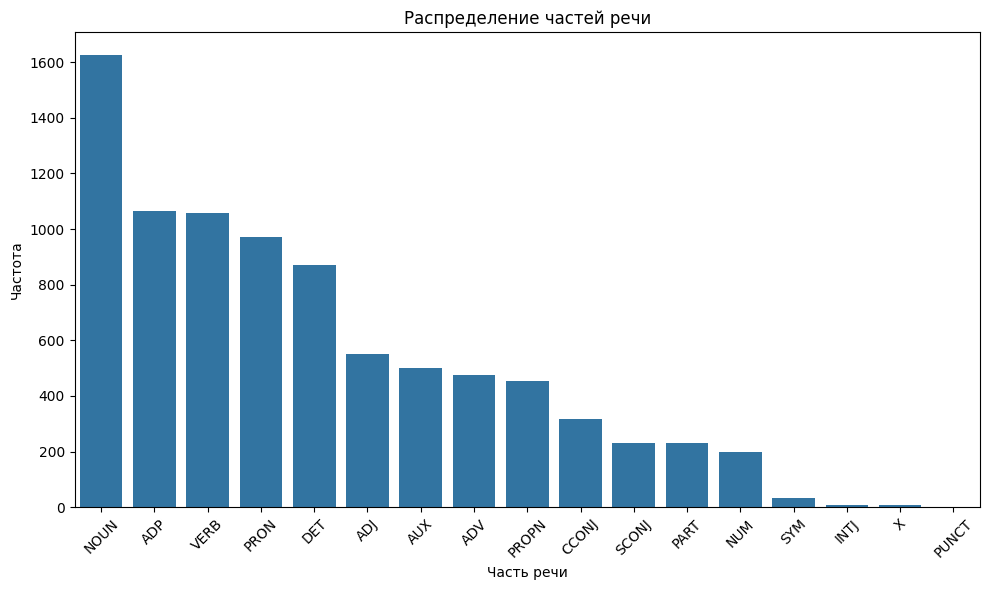

In [23]:

# Распределение частей речи
data_pos = (
    dataframe
    .groupby('pos')
    .size()
    .sort_values(ascending=False)
    .reset_index(name='count')
)

PLT.figure(figsize=(10,6))
seaborn.barplot(data=data_pos, x='pos', y='count')

PLT.title('Распределение частей речи')
PLT.xlabel('Часть речи')
PLT.ylabel('Частота')
PLT.xticks(rotation=45)
PLT.tight_layout()
PLT.show()

###Количество стоп-слов в тексте

In [15]:
# процент стоп-слов
data_stopwords = dataframe.groupby('is_stop').size()
stopwords = data_stopwords.get(True)
all_words = len(dataframe)
stopwords = int((stopwords / all_words) * 100)
print('\n\nПроцент стоп-слов', stopwords, '%')



Процент стоп-слов 55 %


###Выводы
В тексте наблюдается высокая доля именных частей речи, в данном случае существительных, что указывает на описательный стиль повествования. Распределение описательных частей речи достаточно небольшое, что указывает на ограниченность описательного вокабуляра автора или недостаточную образность текста.

Стоп-слова составляют более половины текстового материала, что указывает на ограниченность словарного запаса автора или на избыточность повествования и отсутствием уникальной информации и разнообразия действий.

###POS анализ

In [18]:
# 10 наиболее часто встречающихся слов, которые не являются стоп-словами
not_is_stop = dataframe[dataframe['is_stop'] == False]
not_is_stop = not_is_stop.groupby('lemma').size().sort_values(ascending=False).head(10)

# часто встречающиеся именованные сущности в тексте
named_entities = [(ent.text, ent.label_) for ent in doc.ents]
named_entities = pd.DataFrame(named_entities, columns = ['entity', 'label'])
top_named_entities = named_entities.groupby('entity').size().sort_values(ascending=False).head(10)

# % токенов, относящихся к именованным сущностям
p_named_entities = sum(len(ent.text.split()) for ent in doc.ents) # split для того, чтобы разделить словосочетания на слова
p_named_entities = (p_named_entities / all_words) * 100
print('\n\n% токенов, относящихся к именованным сущностям', p_named_entities, '%')



% токенов, относящихся к именованным сущностям 9.42079553384508 %


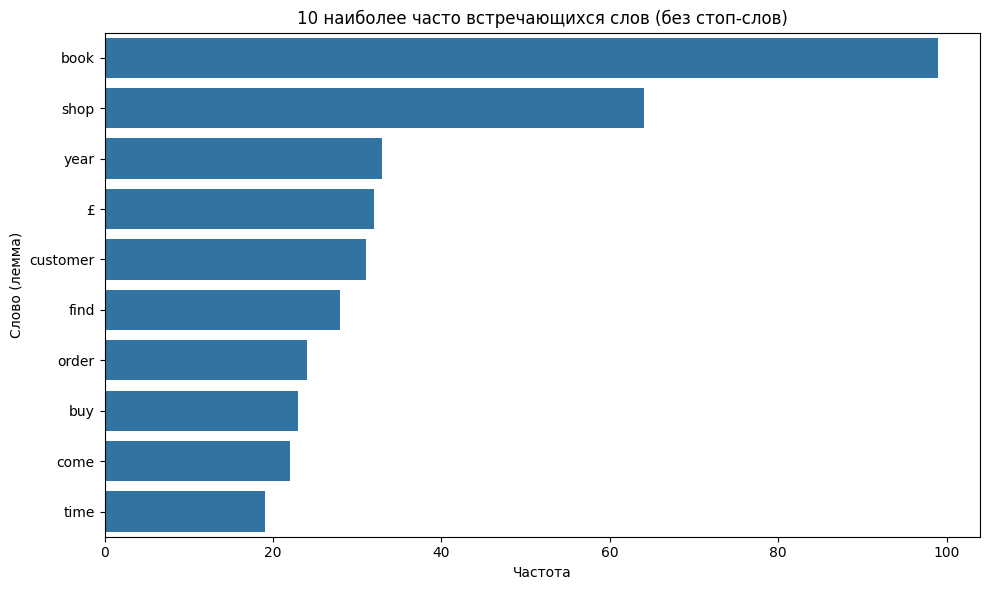

In [19]:
# Визуализация

not_is_stop = dataframe[dataframe['is_stop'] == False]
not_is_stop = not_is_stop.groupby('lemma').size().sort_values(ascending=False).head(10).reset_index(name='count')

PLT.figure(figsize=(10,6))
seaborn.barplot(data=not_is_stop, x='count', y='lemma')

PLT.title('10 наиболее часто встречающихся слов (без стоп-слов)')
PLT.xlabel('Частота')
PLT.ylabel('Слово (лемма)')
PLT.tight_layout()
PLT.show()

###Выводы
Взятый литературный отрывок является художественным полуавтобиографическим текстом про торговлю книгами. Предполагается, что тексте в большинстве посвящен книжкому делу, что подстверждается количественным подсчетом лемм. Самыми частотными словами являются книги, магазин и покупатели, что свидетельствует о соответвии тематики книги и её описания.

###Лексическое разнообразие

In [22]:
# другая метрика -
unique_w = dataframe['lemma'].nunique()
type_token_ratio = unique_w / all_words
type_token_ratio = round(type_token_ratio, 3)
print('\n\nЛексическое разнообразие:', type_token_ratio)
file.close()



Лексическое разнообразие: 0.228


###Выводы
Был вычислен Type-token ratio (TTR), коэффициента лексического разнообразия (или индекс лексического разнообразия), который измеряет богатство словаря в тексте. Его значение далеко от 1 (идеальное значение), что свидетельствует от отсутсвии лексического разнообразия, т.е. присутствует скудность лексического состава произведения, однотипность слов и конструкций.

###Средняя длина слов в тексте



средняя длина слова 4.334


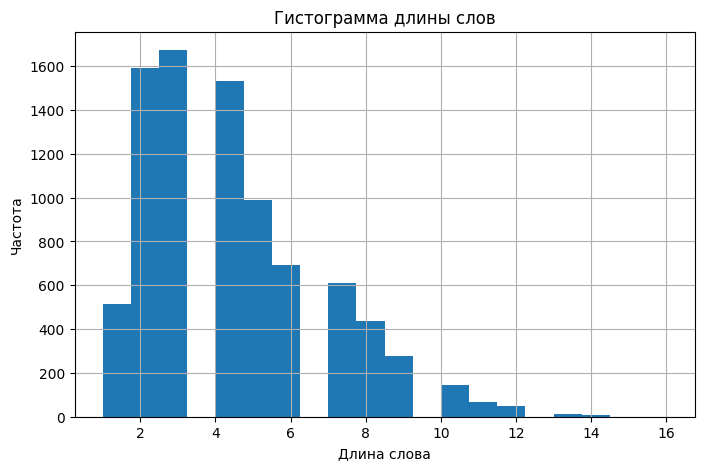

In [21]:
# другая метрика - средняя длина слов
len_word = dataframe['token'].str.len().mean() # mean - среднее значение по столбцу
len_word = round(len_word, 3)
print('\n\nСредняя длина слова', len_word)

PLT.figure(figsize=(8,5))
dataframe['token'].str.len().hist(bins=20)
PLT.title('Гистограмма длины слов')
PLT.xlabel('Длина слова')
PLT.ylabel('Частота')
PLT.show()

###Выводы
На гистограмме отображена средняя длина слова, которая для данного текса составляет около 4 букв, что указывает на скучный, простой словарный состав произведения, минимальное присутствие слов книжного стиля и слов продвинутого уровня.